In [1]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint
from scipy.interpolate import interp1d

In [2]:
%matplotlib inline

In [3]:
from scipy.integrate import ode
M=2.5e19
O2=0.2*M
H2O=15./760.*M

J1a=1e-30
k2=6e-34*M*O2 
k3=1e-11 
J4a=1e-30 
k5=1e-11
k6=1e-10
k7=5e-13
k8=8.5e-12
k9=1.4e-11
k10=6e-14
k11 = 2e-15 # HO2+O3
k12 = 7e-14# HO+O3
k13 = 1.1e-13 # OH + HONO2
k14 = 2.8e-12 # HO2+  HO2

htimes = np.linspace(0, 125, 125)
sunlight = [0,0,0,0,0,0.5,1,1.5,2,2.5,3,4,5,4,3,2.5,2,1.5,1,0.5,0,0,0,0,0,\
                     0,0,0,0,0,0.5,1,1.5,2,2.5,3,4,5,4,3,2.5,2,1.5,1,0.5,0,0,0,0,0,\
                     0,0,0,0,0,0.5,1,1.5,2,2.5,3,4,5,4,3,2.5,2,1.5,1,0.5,0,0,0,0,0,\
                     0,0,0,0,0,0.5,1,1.5,2,2.5,3,4,5,4,3,2.5,2,1.5,1,0.5,0,0,0,0,0,\
                     0,0,0,0,0,0.5,1,1.5,2,2.5,3,4,5,4,3,2.5,2,1.5,1,0.5,0,0,0,0,0]
photons = interp1d(htimes, sunlight, kind='cubic')

emisno=0
emisco=0

In [4]:
def kinetic_equations(t,state):
    NO2, NO, O3, O, OH, HO2, CO, O1D, HONO2 = state
    # define photons as a time dependent function 
    # and set photolysis rates
    J1 =  5e-3*photons(t/3600)
    J4 =  1e-6*photons(t/3600)

    dNO2 = -J1*NO2   + k3*NO*O3      + k8*HO2*NO - k9*OH*NO2 +  k13*OH*HONO2
    dNO  =  J1*NO2   - k3*O3*NO      - k8*HO2*NO # + emisno*photons(t/3600)
    dO3  =  k2*O     - k3*NO*O3      - J4*O3
    dO   =  J1*NO2   - k2*O          + k5*O1D*M
    dOH  =  2.*k6*O1D*H2O - k7*OH*CO + k8*HO2*NO + k11*HO2*O3 - k12*OH*O3 - k9*OH*NO2  
    dHO2 =                  k7*OH*CO - k8*HO2*NO - k11*HO2*O3 + k12*OH*O3 - k14*HO2*HO2 # + emisho2*photons(t/3600)
    dCO  = -k7*OH*CO # + emisco*photons(t/3600)
    dO1D =  J4*O3    - k5*O1D*M     - k6*O1D*H2O
    dHONO2 = k9*OH*NO2 - k13*OH*HONO2

    return [dNO2, dNO, dO3, dO, dOH, dHO2, dCO, dO1D, dHONO2]

In [15]:
ppt=1e-12*M
ppb=1e-9*M
C0 = [6e7, 2.5e7, 7.5e11, 0, 0, 0, 200*ppb, 0, 0] #NO2, NO, O3, O, OH, HO2, CO, O1D, HONO2
ts = []
ys = []

t0 = 0
t1 = 5*86400 # 5 days
dt = 300 # timestep
r = ode(kinetic_equations).set_integrator('lsoda', method='bdf', nsteps=10000)
r.set_initial_value(C0, t0)

while r.t<t1:
    r.integrate(r.t+dt)
    if r.successful:
        ts.append(r.t)
        ys.append(r.y)

print('done')

done


In [16]:
import numpy as np
np.shape(ys)
ys=np.array(ys)
ts=np.array(ts)
NO2, NO, O3, O, OH, HO2, CO, O1D, HONO2 = ys.T

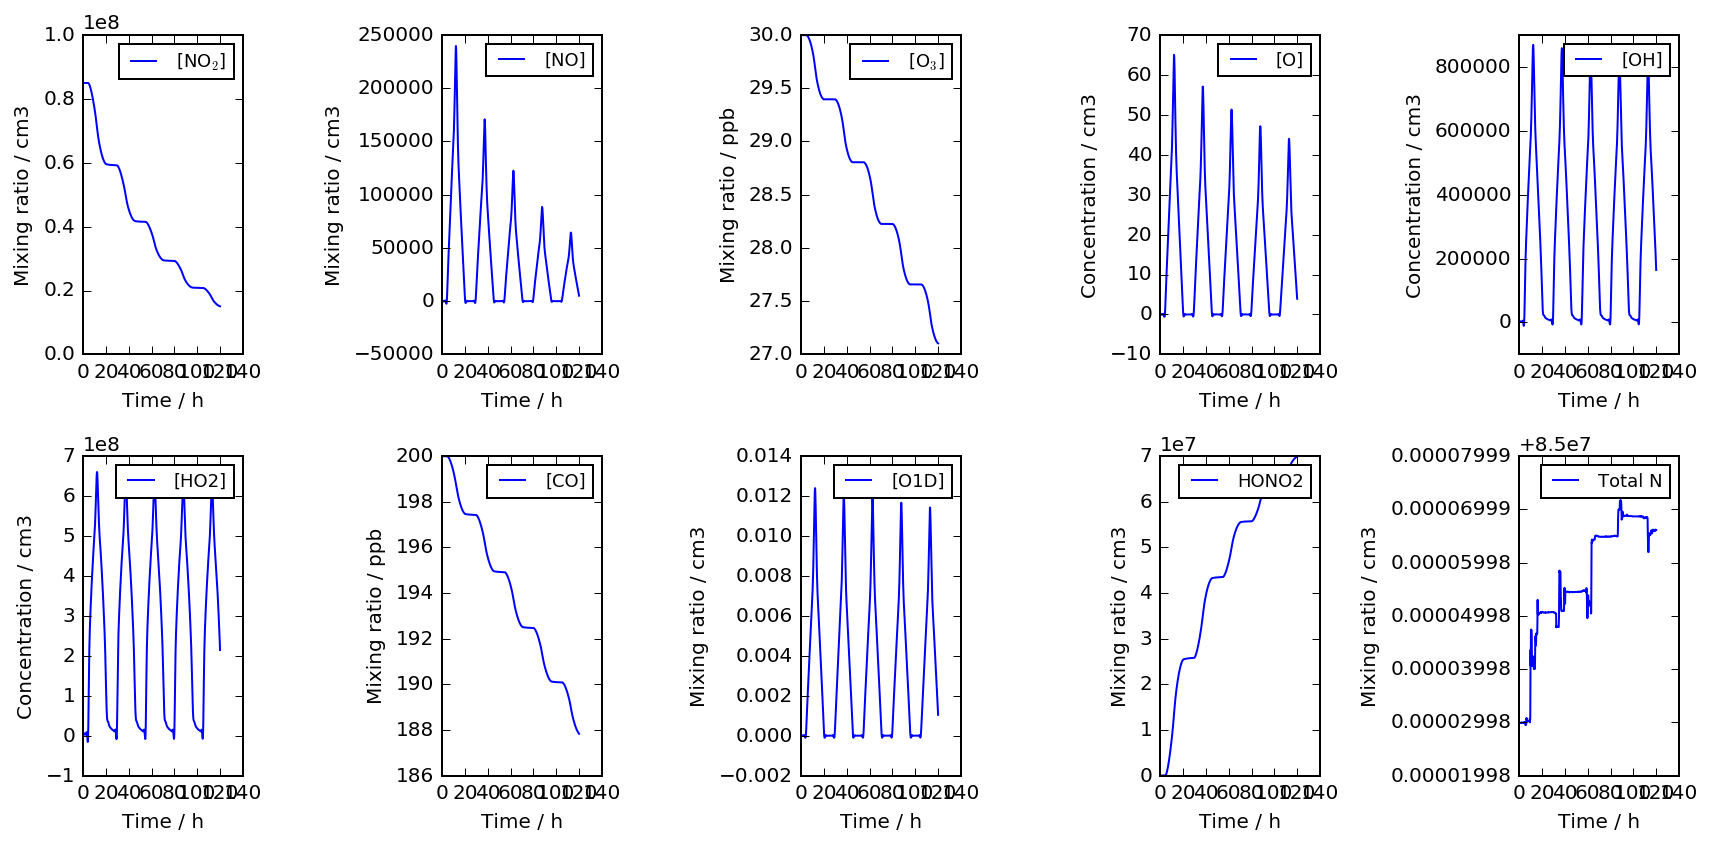

In [17]:
# plot results
plt.figure(figsize=(12,6), dpi=200)
plt.subplot(2,5,1)
plt.plot(ts/3600, NO2, label = '[NO$_2$]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.ylim(0,1e8)
plt.legend(fontsize=9)

plt.subplot(2,5,2)
plt.plot(ts/3600, NO, label = '[NO]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
#plt.xlim([-0.1,100])
plt.legend(fontsize=9)

plt.subplot(2,5,3)
plt.plot(ts/3600, O3/ppb, label = '[O$_3$]')
plt.ylabel('Mixing ratio / ppb')
#plt.xlim([-0.1,100])
plt.legend(fontsize=9)

plt.subplot(2,5,4)
plt.xlabel('Time / h')
plt.plot(ts/3600, O, label = '[O]')
plt.ylabel('Concentration / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,5)
plt.plot(ts/3600, OH, label = '[OH]')
plt.xlabel('Time / h')
plt.ylabel('Concentration / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,6)
plt.xlabel('Time / h')
plt.ylabel('Concentration / cm3')
plt.plot(ts/3600, HO2, label = '[HO2]')
plt.legend(fontsize=9)

plt.subplot(2,5,7)
plt.plot(ts/3600, CO/ppb, label = '[CO]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / ppb')

plt.legend(fontsize=9)

plt.subplot(2,5,8)
plt.plot(ts/3600, O1D, label = '[O1D]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,9)
plt.plot(ts/3600, HONO2, label = 'HONO2')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,10)
plt.plot(ts/3600, (NO+NO2+HONO2), label = 'Total N')
plt.ylabel('Mixing ratio / cm3')
plt.xlabel('Time / h')
plt.legend(fontsize=9)
plt.tight_layout()
plt.show()

In [8]:
# comparison with more complete mechanism solved using KPP for same initial conditions
box_model_data = plt.loadtxt('../UKCA_box_model.out', skiprows=1)

In [9]:
#HONO2           ,HO2           ,OH           ,O3P           ,O1D           ,O3           ,NO           ,NO2           ,
ts = box_model_data[:,0]
HONO2 =  box_model_data[:,1]
HO2=box_model_data[:,2]
OH =box_model_data[:,3]
O =box_model_data[:,4]
O1D =box_model_data[:,5]
O3 =box_model_data[:,6]
NO =box_model_data[:,7]
NO2 =box_model_data[:,8]

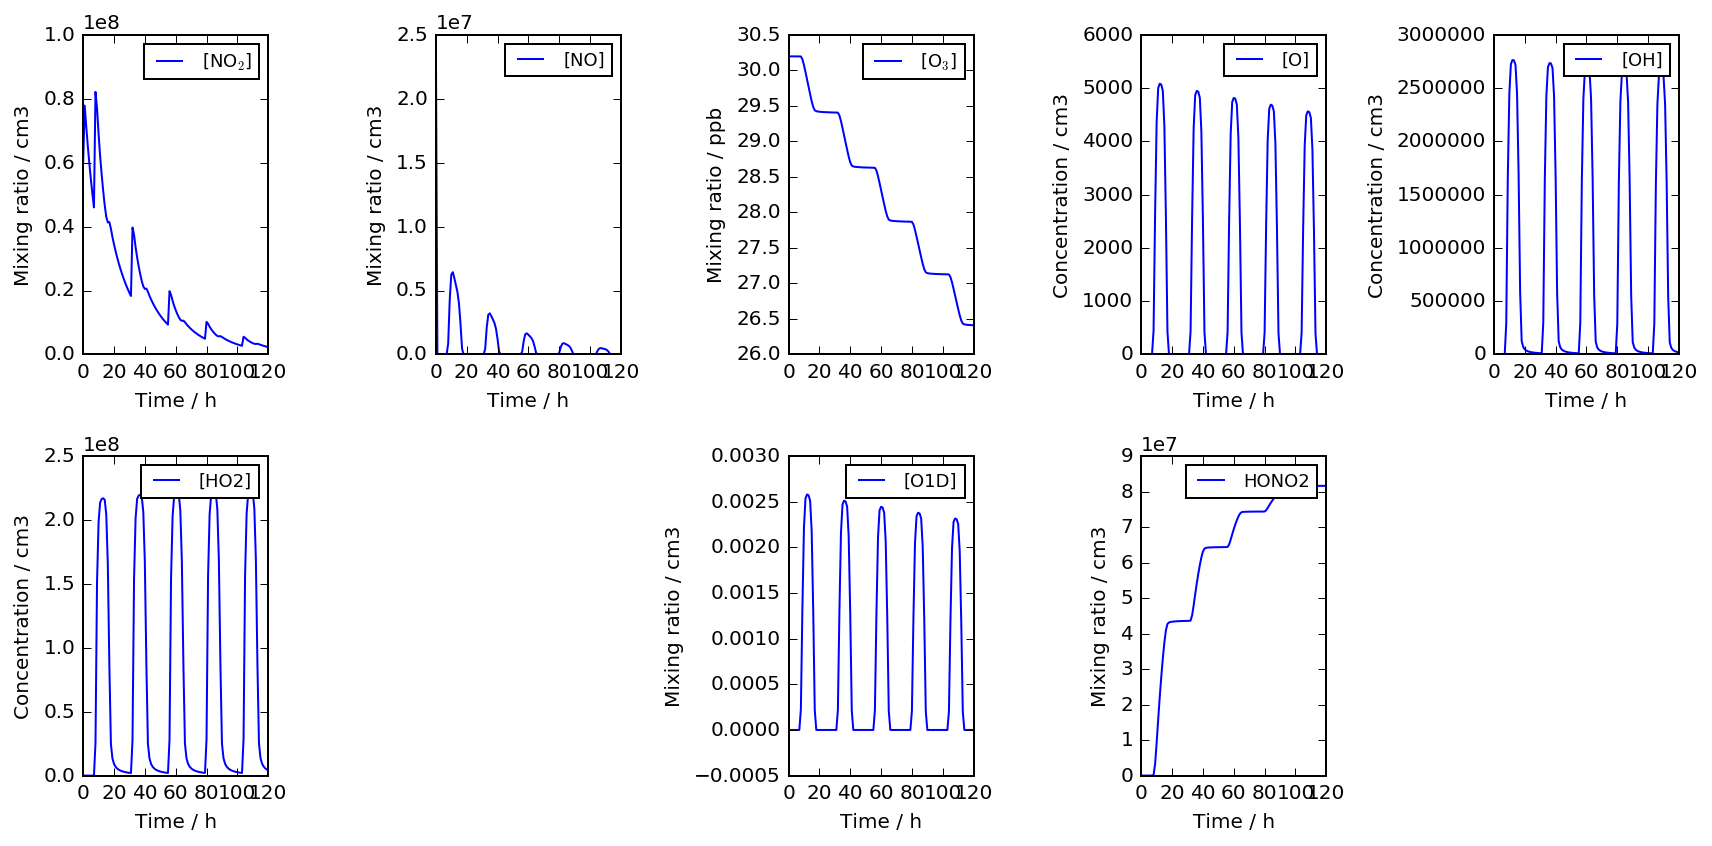

In [12]:
## plot results
plt.figure(figsize=(12,6), dpi=200)
plt.subplot(2,5,1)
plt.plot(ts/3600, NO2, label = '[NO$_2$]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.ylim(0,1e8)
plt.legend(fontsize=9)

plt.subplot(2,5,2)
plt.plot(ts/3600, NO, label = '[NO]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
#plt.xlim([-0.1,100])
plt.legend(fontsize=9)

plt.subplot(2,5,3)
plt.plot(ts/3600, O3/ppb, label = '[O$_3$]')
plt.ylabel('Mixing ratio / ppb')
#plt.xlim([-0.1,100])
plt.legend(fontsize=9)

plt.subplot(2,5,4)
plt.xlabel('Time / h')
plt.plot(ts/3600, O, label = '[O]')
plt.ylabel('Concentration / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,5)
plt.plot(ts/3600, OH, label = '[OH]')
plt.xlabel('Time / h')
plt.ylabel('Concentration / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,6)
plt.xlabel('Time / h')
plt.ylabel('Concentration / cm3')
plt.plot(ts/3600, HO2, label = '[HO2]')
plt.legend(fontsize=9)

plt.subplot(2,5,8)
plt.plot(ts/3600, O1D, label = '[O1D]')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.legend(fontsize=9)

plt.subplot(2,5,9)
plt.plot(ts/3600, HONO2, label = 'HONO2')
plt.xlabel('Time / h')
plt.ylabel('Mixing ratio / cm3')
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()